In [3]:
using Pkg
# Pkg.add("Polynomials")
Pkg.add("SpecialPolynomials")
# Pkg.add("Plots")
# Pkg.add("CSV")
# Pkg.add("DataFrames")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed Memoize ──────────── v0.4.4
   Installed SpecialPolynomials ─ v0.4.7
    Updating `~/.julia/environments/v1.8/Project.toml`
  [a25cea48] + SpecialPolynomials v0.4.7
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [c03570c3] + Memoize v0.4.4
  [a25cea48] + SpecialPolynomials v0.4.7
Precompiling project...
  ✓ Memoize
  ✓ SpecialPolynomials
  2 dependencies successfully precompiled in 7 seconds. 203 already precompiled.


In [4]:
using Polynomials
using SpecialPolynomials
using Plots
using LinearAlgebra
using CSV
using DataFrames

### Zadanie 1

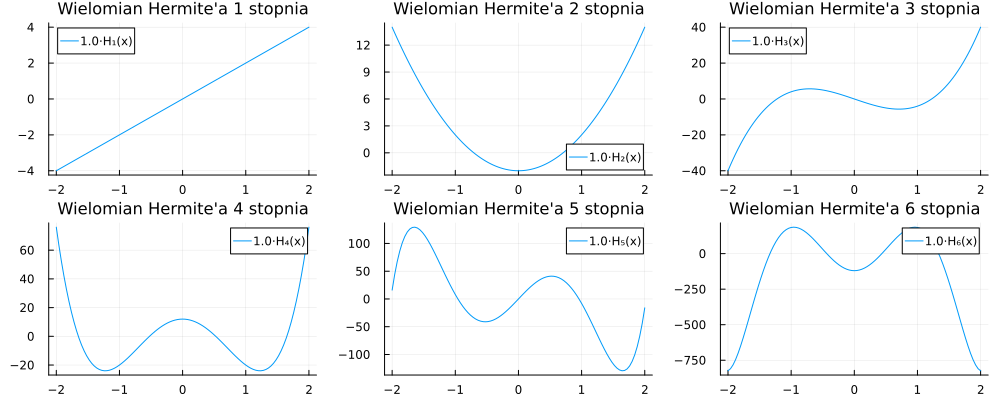

In [5]:
plot(-2, 2, layout = 6,size=(1000,400))
for degree in 1:6
    plot!(basis(Hermite, degree), -2, 2, subplot=degree, title="Wielomian Hermite'a $(degree) stopnia", titlefontsize=11)
end
plot!()

### Zadanie 2

In [3]:
function base_fun(k, x, norm=true)
    H_k = basis(Hermite, k).(x)
    app = H_k .* exp.(-(x.^2)/2)
    # normalize to have norm 1
    if norm
        return normalize(app)
    end
    return app
end

base_fun (generic function with 2 methods)

In [4]:
xx = -2:0.05:2

-2.0:0.05:2.0

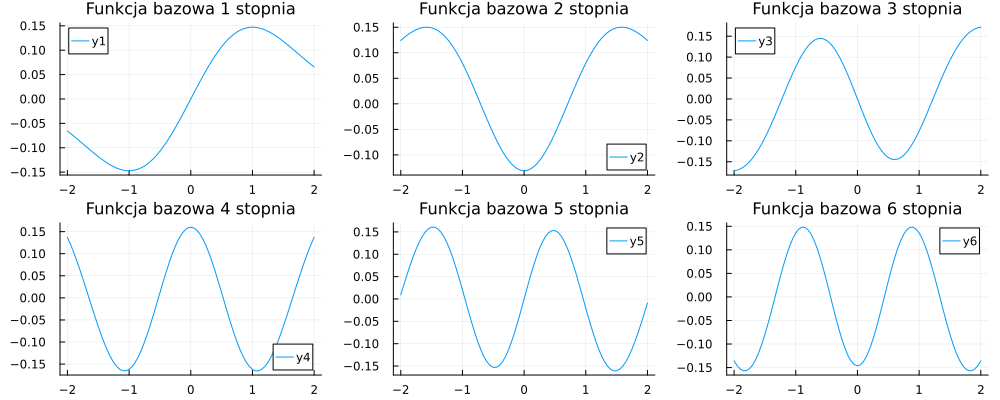

In [5]:
plot(-2, 2, layout = 6, size=(1000,400))
for degree in 1:6
    plot!(xx, base_fun(degree, xx), subplot=degree, title="Funkcja bazowa $(degree) stopnia", titlefontsize=11)
end
plot!()

### Zadanie 3

In [6]:
ENV["COLUMNS"]=120
xx = -1000:0.05:1000
poly_dots = [dot(basis(Hermite, deg1).(xx), basis(Hermite, deg2).(xx)) for deg1 in 1:6, deg2 in 1:6]

6×6 Matrix{Float64}:
      5.33373e10       0.0              1.28016e17  -32768.0          3.65776e23  6.87195e10
      0.0              1.28016e17  -32768.0              3.65776e23   1.37439e11  1.13802e30
      1.28016e17  -32768.0              3.65777e23      -6.87195e10   1.13802e30  1.44115e17
 -32768.0              3.65776e23      -6.87195e10       1.13803e30  -7.20576e17  3.72461e36
      3.65776e23       1.37439e11       1.13802e30      -7.20576e17   3.72461e36  1.20893e24
      6.87195e10       1.13802e30       1.44115e17       3.72461e36   1.20893e24  1.26069e43

In [7]:
base_dots = [dot(base_fun(deg1, xx), base_fun(deg2, xx)) for deg1 in 1:6, deg2 in 1:6]

6×6 Matrix{Float64}:
  1.0           5.55112e-17   1.12757e-17   0.0          -2.68882e-17   0.0
  5.55112e-17   1.0           0.0          -2.60209e-17  -2.77556e-17  -5.20417e-18
  1.12757e-17   0.0           1.0           0.0          -6.07153e-18   1.38778e-17
  0.0          -2.60209e-17   0.0           1.0           0.0          -3.81639e-17
 -2.68882e-17  -2.77556e-17  -6.07153e-18   0.0           1.0           0.0
  0.0          -5.20417e-18   1.38778e-17  -3.81639e-17   0.0           1.0

In [8]:
base_dots .< eps(Float64)

6×6 BitMatrix:
 0  1  1  1  1  1
 1  0  1  1  1  1
 1  1  0  1  1  1
 1  1  1  0  1  1
 1  1  1  1  0  1
 1  1  1  1  1  0

### Zadanie 4

In [9]:
ekg_data = CSV.read("ecg_data.csv", DataFrame)

xx_ekg = ekg_data.time*40
yy_ekgV = ekg_data.signalV;
base_funs_vals = [base_fun(degree - 1, xx_ekg) for degree in 1:11]
first(ekg_data, 5)

Row,time,signalN,signalV
,Float64,Float64,Float64
1,-0.1,0.0183886,-0.0990972
2,-0.0972222,0.0145191,-0.0920442
3,-0.0944444,0.012849,-0.0831644
4,-0.0916667,0.0124946,-0.0722728
5,-0.0888889,0.0124117,-0.0593656


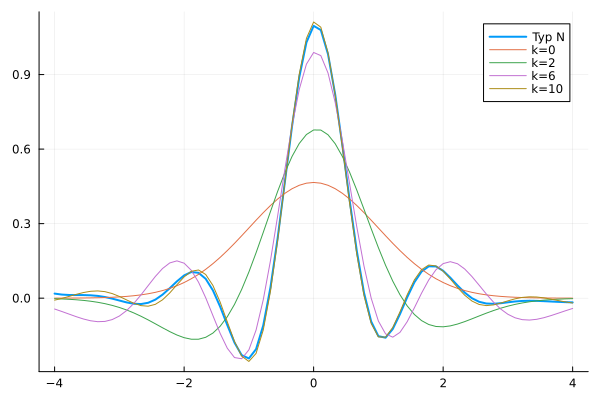

In [15]:
c_vec_n = [dot(ekg_data.signalN, vals) for vals in base_funs_vals]
plot(xx_ekg, ekg_data.signalN, label="Typ N", linewidth=2)

y_app = [0.0 for i in xx_ekg]
for (degree, vals) in enumerate(base_funs_vals)
    y_app .+= (c_vec_n[degree] * vals)
    if degree in [1, 3, 7, 11]
        plot!(xx_ekg, y_app, label="k=$(degree - 1)")
    end
end
plot!()

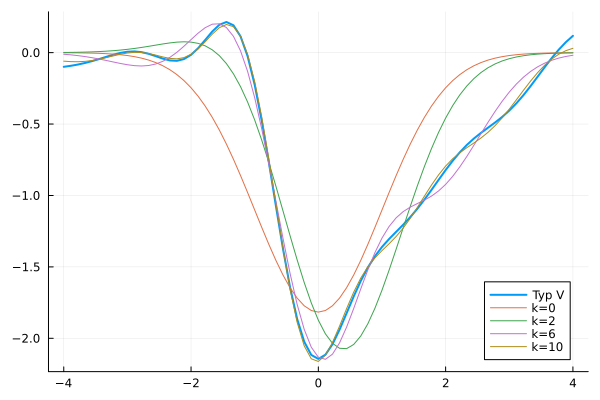

In [14]:
c_vec_v = [dot(ekg_data.signalV, vals) for vals in base_funs_vals]
plot(xx_ekg, ekg_data.signalV, label="Typ V", linewidth=2)

y_app = [0.0 for i in xx_ekg]
for (degree, vals) in enumerate(base_funs_vals)
    y_app .+= (c_vec_v[degree] * vals)
    if degree in [1, 3, 7, 11]
        plot!(xx_ekg, y_app, label="k=$(degree - 1)")
    end
end
plot!()

### Zadanie 5

In [12]:
using Statistics
mse(y1, y2) = mean((y1-y2).^2)

mse (generic function with 1 method)

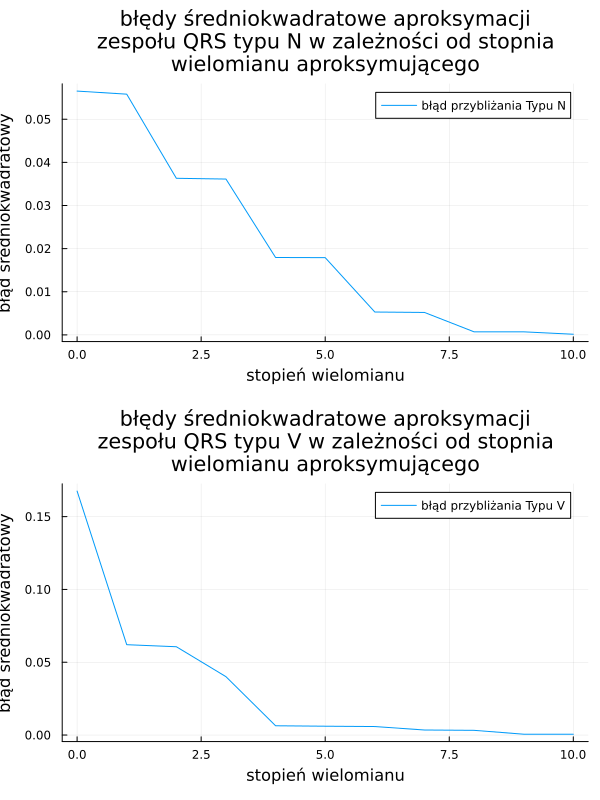

In [13]:
c_vec_n = [dot(ekg_data.signalN, vals) for vals in base_funs_vals]

y_app = [0.0 for i in xx_ekg]
mses_n = []
for (degree, vals) in enumerate(base_funs_vals)
    y_app .+= (c_vec_n[degree] * vals)
    push!(mses_n, mse(y_app, ekg_data.signalN))
end

c_vec_v = [dot(ekg_data.signalV, vals) for vals in base_funs_vals]

y_app = [0.0 for i in xx_ekg]
mses_v = []
for (degree, vals) in enumerate(base_funs_vals)
    y_app .+= (c_vec_v[degree] * vals)
    push!(mses_v, mse(y_app, ekg_data.signalV))
end
plot(layout=(2,1), size=(600, 800), xlabel="stopień wielomianu", ylabel="błąd średniokwadratowy")
plot!(0:10, mses_n, subplot=1, label="błąd przybliżania Typu N", title="błędy średniokwadratowe aproksymacji\nzespołu QRS typu N w zależności od stopnia\nwielomianu aproksymującego")
plot!(0:10, mses_v, subplot=2, label="błąd przybliżania Typu V", title="błędy średniokwadratowe aproksymacji\nzespołu QRS typu V w zależności od stopnia\nwielomianu aproksymującego")